# **Esercizi extra - parte 2**

In questo notebook troviamo esercizi relativi alla prima parte del programma di numerica, di vario grado di difficoltà (indicato nel testo).

# **Interpolazione**

### Esercizio 1

*Difficoltà: facile.*

Abbiamo a disposizione il valore della resistenza aerodinamica (drag) di un veicolo per diversi
valori della velocità. I dati sono salvati come v e D nel file drag.txt e possono essere caricati
con il comando numpy.loadtxt. 

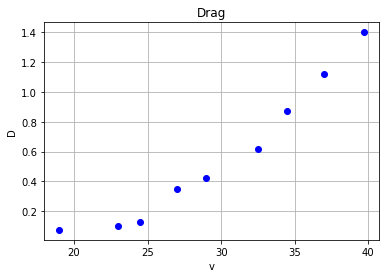

In [1]:
# step 0 -> ricordarsi di importare i pacchetti numpy and matplotlib

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
data = np.loadtxt('drag.txt')

# rappresentazione grafica
plt.plot(data[:,0], data[:,1],'bo',linewidth=2.0)
# specifiche grafiche titolo, legenda, grid,
plt.title("Drag")
plt.xlabel('v')
plt.ylabel('D')
plt.grid()
plt.show()

Calcolare il polinomio ai minimi quadrati che approssima i dati forniti, scegliendo il grado
polinomiale pari a 1, 2 e 3.

In [2]:
p_minq_1 = np.polyfit(data[:,0], data[:,1], deg = 1)
minq_1 = lambda x: np.polyval(p_minq_1, x)
p_minq_2 = np.polyfit(data[:,0], data[:,1], deg = 2)
minq_2 = lambda x: np.polyval(p_minq_2, x)
p_minq_3 = np.polyfit(data[:,0], data[:,1], deg = 3)
minq_3 = lambda x: np.polyval(p_minq_3, x)

Rappresentare i dati forniti e le tre curve approssimanti calcolate al punto precedente sulla
stessa figura. Cosa si osserva?

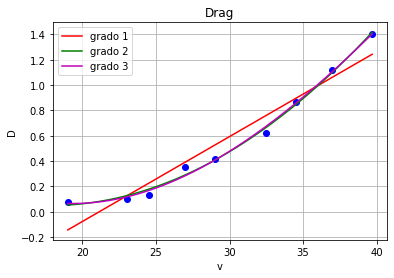

In [3]:
vplot = np.linspace(min(data[:,0]), max(data[:,0]), 1000)

# rappresentazione grafica
plt.plot(data[:,0], data[:,1],'bo',linewidth=2.0)
plt.plot(vplot, minq_1(vplot),'r',label='grado 1')
plt.plot(vplot, minq_2(vplot),'g',label='grado 2')
plt.plot(vplot, minq_3(vplot),'m',label='grado 3')
# specifiche grafiche titolo, legenda, grid,
plt.legend()
plt.title("Drag")
plt.xlabel('v')
plt.ylabel('D')
plt.grid()
plt.show()

Osserviamo che la curva di grado 1 approssima male i dati, mentre le curve di grado 2 e 3 seguono bene l’andamento dei dati sperimentali, e sono molto simili fra loro.

Per un’analisi più quantitativa, per i tre casi considerati calcolare la quantità
$$e^2= \displaystyle \sum_{i=0}^N (D_i - \pi_m(v_i))^2$$
dove $\pi_m$ indica l'approssimante ai minimi quadrati di grado $m$, nel nostro caso $m=1,2,3$, e $N+1$ \`e il numero di punti. 

In [4]:
e2 = []
for p in [minq_1, minq_2, minq_3]:
    D = p(data[:,0])
    e2.append(np.sum((D-data[:,1])**2))
    
print(e2)

[0.11885037425237634, 0.010473857938333959, 0.00963904751115871]


Notiamo che passando da $m=1$ a $m=2$ si ottieneun netto miglioramento, mentre non si notano grandi miglioramenti passando al grado 3. Infatti, il grado 2 rispecchia la dipendenza "reale" della resistenza dalla velocità. 

# **Interpolazione**

### Esercizio 2

*Difficoltà: facile.*

Si consideri la seguente funzione:

$$r(x) = \dfrac{1}{2}+  \dfrac{1}{2} \sin(2\pi x)(1-x)$$

che descrive, per $a\leq x\leq b$, il raggio di un solido di rotazione il cui asse coincide con l'asse $x$ (si veda la figura)

![vaso.png](vaso.png)

Fissati $a=0$, $b=1$, vogliamo calcolarne il volume.

Definire la funzione da integrare.

In [5]:
dV = lambda x: np.pi*(0.5+0.5*np.sin(2*np.pi*x)*(1-x))**2

Calcolare il volume del solido con un metodo numerico a scelta, utilizzando $N = 10$ intervalli.

In [6]:
def punto_medio(f,a,b,N):
    h = (b-a)/N
    xi = np.linspace(a+h*0.5, b-h*0.5, N)
    fi = f(xi)
    return h*np.sum(fi)

In [7]:
a = 0
b = 1
N = 10

V_10 = punto_medio(dV, a, b, N)
print(V_10)

1.1655329917454031


Ripetere il calcolo con N = 20, N = 40, N = 80. Si commenti il risultato ottenuto.

In [8]:
V = [V_10]
for N in [20, 40, 80]:
    V.append(punto_medio(dV,a,b,N))
    
print(V)

[1.1655329917454031, 1.162358192126849, 1.1615816487605, 1.1613885431761304]


Rappresentiamo i risultati ottenuti in un grafico.

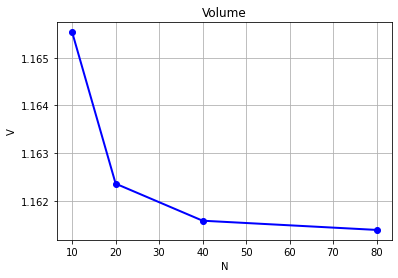

In [9]:
plt.plot([10, 20, 40, 80], V, 'bo-',linewidth=2.0)
plt.title("Volume")
plt.xlabel('N')
plt.ylabel('V')
plt.grid()
plt.show()

### Esercizio 3

*Difficoltà: facile.*

Abbiamo a disposizione il valore della velocità di un veicolo in funzione del tempo. I dati sono salvati come t (tempo) e v (velocità) nel file speed.txt e possono essere caricati con il comando numpy.loadtxt. 

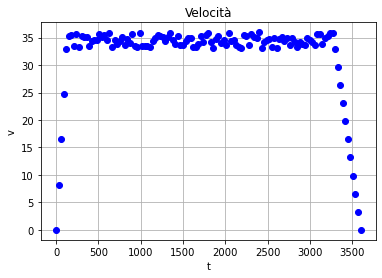

In [1]:
# step 0 -> ricordarsi di importare i pacchetti numpy and matplotlib

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
data = np.loadtxt('speed.txt')

# rappresentazione grafica
plt.plot(data[:,0], data[:,1],'bo',linewidth=2.0)
# specifiche grafiche titolo, legenda, grid,
plt.title("Velocità")
plt.xlabel('t')
plt.ylabel('v')
plt.grid()
plt.show()

Vogliamo calcolare lo spazio percorso integrando numericamente la velocità istantanea. 
Determinare, a partire dal vettore di tempi $t$, l’intervallo $t ∈ [t_{min} , t_{max} ]$ e il numero di
sottointervalli.

In [11]:
tmin = np.min(data[:,0])
tmax = np.max(data[:,0])
Nt = len(data[:,0])

print(tmin,tmax,Nt-1)

0.0 3600.0 120


Dato che la velocità istantanea non è fornita come funzione, ma solo attraverso i suoi valori in alcuni istanti discreti, implementare una versione modificata del metodo dei trapezi (composito) che possa ricevere in ingresso tale input.

In [12]:
def trapezi(x,y):
    N = len(x)-1
    dI = 0.5*(y[1:N+1]+y[0:N])*(x[1:N+1]-x[0:N])
    return np.sum(dI)

Chiamiamo la function fornendo in input i dati caricati.

In [13]:
I = trapezi(data[:,0], data[:,1])
print(I)

116655.74213999999


Approssimare i dati forniti con un polinomio ai minimi quadrati di grado 4.

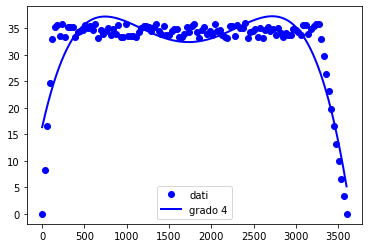

In [14]:
p_minq_4 = np.polyfit(data[:,0], data[:,1], deg = 4)
minq = lambda x: np.polyval(p_minq_4, x)
t_plot = np.linspace(tmin,tmax,1000)
plt.plot(data[:,0], data[:,1],'bo',linewidth=2.0,label = 'dati')
plt.plot(t_plot, minq(t_plot),'b-',linewidth=2.0, label = 'grado 4')
plt.legend()


Costruire la corrisponente funzione e integrarla con la function trapcomp fornita a lezione. Confrontare il risultato ottenuto con quello del punto precedente.

In [15]:
def trapcomp(f, a, b, N):
    x = np.linspace(a, b, N)
    h = (b-a)/N
    I = 0.5*h*(f(a)+f(b)+ 2*np.sum(f(x[1:N])))
    return I

In [16]:
I_metodo2 = trapcomp(minq, tmin, tmax, Nt)
print(I_metodo2)

115525.69753659588


L'errore commesso si può calcolare come

In [17]:
e = np.abs(I-I_metodo2)/I*100
print('errore percentuale',e)

errore percentuale 0.9687003680006838


# **Approssimazione di derivate**

### Esercizio 4

*Difficoltà: facile.*

Consideriamo la seguente legge del moto

$$s(t) = \exp\left(-\frac{t}{10}\right)\cos(t)$$

dove s rappresenta la posizione di un corpo lungo una linea in funzione del tempo. Consideriamo
l’intervallo di tempo $t \in [0, 10]$.

Suddividere l’intervallo di tempo con un passo $h = 0.5$ e calcolare la derivata prima approssimata $\delta s$ in tutti i punti $t_i = ih$. Utilizzare una differenza finita centrata dove è possibile.


Innanzitutto definiamo la funzione che descrive la legge del moto data; inoltre definiamo anche
la sua derivata analitica per poter poi calcolare l’errore commesso numericamente.

In [18]:
s = lambda t: np.exp(-t/10.)*np.cos(t)
s_t = lambda t: -0.1*np.exp(-t/10)*np.cos(t) - np.exp(-t/10.)*np.sin(t) 

Definita l’ampiezza del passo dt=0.5 creiamo l’array degli istanti di tempo discreti e su tali punti possiamo valutare e visualizzare la funzione fornita.

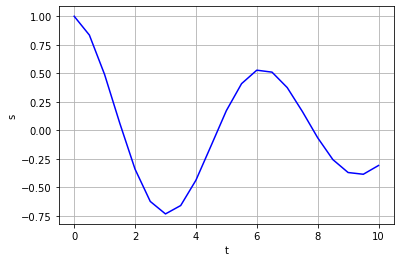

In [31]:
dt = 0.5
tvec = np.linspace(0,10, int(10/dt)+1)
Nstep = len(tvec)

plt.plot(tvec, s(tvec),'b-',label='funzione')
plt.xlabel('t')
plt.ylabel('s')
plt.grid()
plt.show()

In [32]:
delta_s = []
svec = s(tvec)

delta_s = []
delta_s.append( (svec[1]-svec[0])/dt )
for i in range(1,Nstep-1):
    delta_s.append( (svec[i+1]-svec[i-1])/(2*dt) )
delta_s.append( (svec[Nstep-1]-svec[Nstep-2])/dt )

Rappresentare il risultato ottenuto in funzione del tempo e confrontarlo con l’espressione analitica $s^\prime(t)$ della derivata.

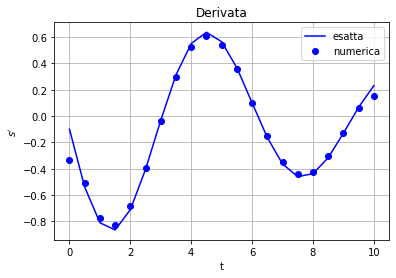

In [33]:
plt.plot(tvec, s_t(tvec),'b-',label='esatta')
plt.plot(tvec, delta_s,'bo',label='numerica')
plt.title('Derivata')
plt.xlabel('t')
plt.ylabel('$s^\prime$')
plt.grid()
plt.legend()
plt.show()

Osserviamo che i maggiori errori sono commessi agli estremi, come era prevedibile.

Calcolare l'errore come 
$$e=\displaystyle\max_{i=0}^{N_{step}}|s^\prime(t_i)-\delta s(t_i)|$$

In [34]:
err = np.max(np.abs(s_t(tvec)-delta_s))
print('errore  ', err)

errore   0.23043528940231747


Ripetere il punto precedente utilizzando h = 0.25 (pari a metà del passo usato
precedetemente). Cosa si osserva? Perché?

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.  ]


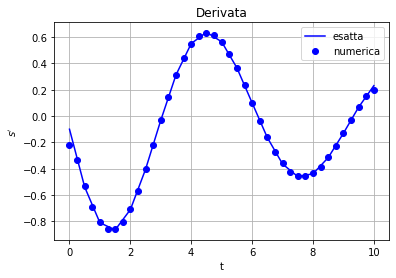

errore   0.12004044487292828


In [37]:
dt = 0.25
tvec_fine = np.linspace(0,10,int(10/0.25)+1)
Nstep_fine = len(tvec_fine)
delta_s_fine = []
svec_fine = s(tvec_fine)

delta_s_fine = []
delta_s_fine.append( (svec_fine[1]-svec_fine[0])/dt )
for i in range(1,Nstep_fine-1):
    delta_s_fine.append( (svec_fine[i+1]-svec_fine[i-1])/(2*dt) )
delta_s_fine.append( (svec_fine[Nstep_fine-1]-svec_fine[Nstep_fine-2])/dt )

plt.plot(tvec, s_t(tvec),'b-',label='esatta')
plt.plot(tvec_fine, delta_s_fine,'bo',label='numerica')
plt.title('Derivata')
plt.xlabel('t')
plt.ylabel('$s^\prime$')
plt.grid()
plt.legend()
plt.show()

err = np.max(np.abs(s_t(tvec_fine)-delta_s_fine))
print('errore  ', err)

Notiamo che l'errore dimezza, perché l'errore dominante è del primo ordine, dovuto all'approssimazione con derivate decentrate agli estremi.

# **Equazioni differenziali ordinarie**

### Esercizio 5

*Difficoltà: media.*

Si considerino le equazioni di Lotka-Volterra che rappresentano la dinamica delle popolazioni di
preda e predatore.

$$\begin{cases}
y_1^\prime = A y_1 -B y_1y_2\\
y_2^\prime = C y_1y_2 - D y_2 
\end{cases}$$

dove $y_1$ rappresenta il numero di individui della specie ”prede” (es. conigli) mentre $y_2$ rappresenta i predatori (es. volpi) in un ecosistema. I coefficienti A, B, C, D sono numeri reali positivi.
Nella prima equazione il termine $Ay_1$ indica la crescita dovuta alla riproduzione, mentre il termine $By_1 y_2$ rappresenta la riduzione dovuta alla predazione; nella seconda equazione il termine $Cy_1 y_2$ rappresenta la predazione, ed è un termine che per i predatori determina una crescita (disponibilità di cibo), mentre il termine $Dy_2$ rappresenta la competizione fra predatori. Per semplicità, prendiamo A = D = 1, B = C = 0.1.

Scegliendo come condizioni iniziali $y_0 = [50, 5]^T$ e come tempo finale $T_{end} = 20$, risolvere
il sistema di ODE utilizzando il metodo ode45 di Matlab e rappresentare la soluzione.

Notiamo che in questo caso abbiamo un sistema, quindi la forzante $f$ dovrà essere definita come un vettore.

numero di istanti 313


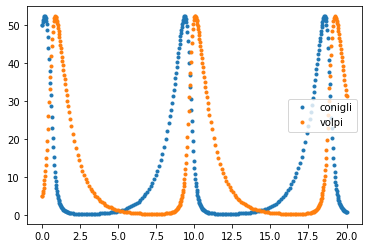

In [67]:
import numpy as np
from scipy.integrate import RK45

# Dati del problema
t0 = 0
t_max = 20
y0 = [50,5]
A = 1
B = 0.1
C = 0.1
D = 1

#forzante
f = lambda t,y:  np.array([A*y[0]-B*y[0]*y[1], C*y[0]*y[1]-D*y[1]])

integratore45 = RK45(f, t0, y0, t_max, rtol=1e-8, atol=1e-8)

tRK45 = [t0]
yRK45 = [y0]

while integratore45.t < t_max:
  integratore45.step()
  tRK45.append(integratore45.t)
  yRK45.append(integratore45.y)

tRK45 = np.array(tRK45)
yRK45 = np.stack(yRK45)

print('numero di istanti', len(tRK45))

plt.plot(tRK45,yRK45,'.')
plt.legend(["conigli","volpi"])

Risolvere lo stesso sistema, con gli stessi dati, utilizzando il metodo di Eulero esplicito
utilizzando un passo temporale pari a 0.1, 0.01 e 0.001. Commentare qualitativamente i
risultati ottenuti.

Ricordiamo che con il metodo di Eulero Esplicito a ogni step la soluzione si calcola con la seguente formula:

$$\mathbf{y}_{n+1} = \mathbf{y}_n + \Delta t \mathbf{f} (t_n , \mathbf{y}_n )$$.

Dobbiamo, dopo avere definito i dati, impostare un ciclo for per calcolare tutti gli istanti temporali.
Per salvare i risultati relativi ai tre diversi passi temporali possiamo fare uso dei dizionari, oppure semplicemente salvare le tre soluzioni in tre variabili diverse.

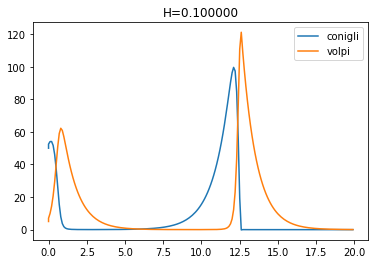

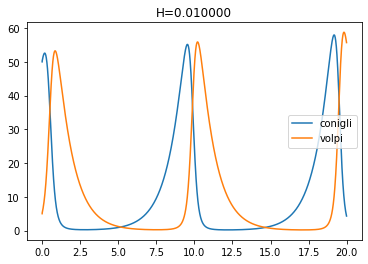

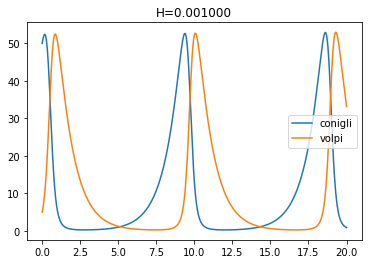

In [73]:
y_EE = {0.1: [], 0.01: [], 0.001: []}
tempi = {0.1: [], 0.01: [], 0.001: []}

for h in [0.1, 0.01, 0.001]:
    y_EE[h] = [y0]
    tempi[h] = [0] 
    for tt in range(0,int(20/h)):
        newy = y_EE[h][-1] + h*f(h*tt, y_EE[h][-1])
        y_EE[h].append(newy)
        tempi[h].append(tt*h)
    y_EE[h]=np.stack(y_EE[h])
    plt.figure()
    plt.plot(tempi[h], y_EE[h])
    plt.legend(["conigli","volpi"])
    plt.title("H=%f" %h)


            


Notiamo che la soluzione è accurata, corrisponde a quella fornita da ODE45, solo nel caso di $h=0.001$, mentre nel caso di ODE45 abbiamo usato solo 313 istanti temporali. Questo è dovuto al fatto che ODE45 è adattivo e usa un passo temporale più fine solo dove è necessario. 

Infine, osserviamo che possiamo rappresentare la soluzione anche nel cosiddetto spazio delle fasi, nel piano $y_1-y_2$, dove appare evidente il comportamento ciclico della soluzione.

Text(0, 0.5, '$y_2$')

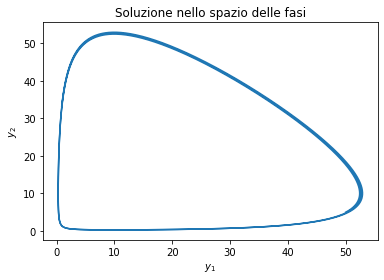

In [76]:
plt.figure()
plt.plot(y_EE[h][:,0], y_EE[h][:][:,1])
plt.title("Soluzione nello spazio delle fasi")
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

### Esercizio 6

*Difficoltà: difficile.*

Si consideri il problema dell’esercizio precedente. Vogliamo risolvere il sistema di equazioni
differenziali non-lineari usando il metodo di Eulero Implicito, utilizzando il metodo di Newton
per risolvere il sistema nonlineare che corrisponde a ogni step temporale.

Definire la funzione df che contiene le derivate del termine forzante rispetto alle componenti
di $y$. Osserviamo che si tratta di una matrice 2 × 2.

In [168]:
import numpy as np
import scipy as sp
from scipy.integrate import RK45
import matplotlib.pyplot as plt

# Dati del problema
t0 = 0
t_max = 20
y_ini = [50.,5.]
A = 1
B = 0.1
C = 0.1
D = 1

#forzante
f = lambda t,y:  np.array([A*y[0]-B*y[0]*y[1], C*y[0]*y[1]-D*y[1]])

Partendo dal codice utilizzato al punto precedente, implementare il metodo di Newton per la soluzione di ogni step temporale (introducendo un ciclo while all’interno del ciclo temporale). Suggerimento: lo jacobiano dipende anche, ma non solo, dalla funzione definita al punto 1.

Ogni step del metodo di Eulero Implicito consiste nella seguente formula:

$$\mathbf{y}_{n+1} = \mathbf{y}_n + \Delta t \mathbf{f} (t_{n+1} , \mathbf{y}_{n+1} )$$.

$$\mathbf{F}(\mathbf{y}_{n+1} ) = \mathbf{y}_{n+1} − \Delta t \mathbf{f} (t_{n+1} , \mathbf{y}_{n+1} ) − \mathbf{y}_n = \mathbf{0}$$

Ad ogni time step dobbiamo quindi risolvere un problema di ricerca degli zeri di un sistema di
equazioni nonlineari, in particolare cerchiamo $\mathbf{y}_{n+1} = [y_1^{n+1} , y_2^{n+1}, \ldots ]^T$ . Per risolvere tale problema nonlineare con il metodo di Newton dobbiamo calcolare le derivate di $\mathbf{F}$, che sono date da:



$$J_{ij}=\begin{cases} 1-\delta t \dfrac{\partial f_i}{\partial y_j}\quad\mathrm{if}\; i=j\\
-\delta t \dfrac{\partial f_i}{\partial y_j}\quad \mathrm{if}\; i\neq j\end{cases}$$.
Nel nostro caso le derivate di $\mathbf{f}$ sono le seguenti:

$$\dfrac{\partial \mathbf{f}}{\partial\mathbf{y}}=\left(\begin{array}{cc} A-By_2 & -By_1\\  C y_2 & C y_1-D\end{array}\right)$$

che possiamo definire nel codice tramite lambda function, così come lo jacobiano.

In [169]:
df = lambda t,y: np.array([[A-B*y[1], -B*y[0]],[C*y[1], C*y[0]-D]])

Ad ogni istante di tempo dobbiamo impostare un ciclo while e risolvere il seguente sistema lineare a ogni iterazione k fino a convergenza:
$$J(\mathbf{y}^{n+1,k+1} − \mathbf{y}^{n+1,k} ) = −\mathbf{r}(t^{n+1} , \mathbf{y}^{n+1,k })$$
dove il residuo $\mathbf{r}$ è
$$\mathbf{r}^{n+1,k} = \mathbf{y}^{n+1,k} − \mathbf{y}^n −\Delta t \mathbf{f} (t^{n+1} , \mathbf{y}^{n+1,k} ).$$
Per verificare la convergenza possiamo confrontare la norma del residuo con una tolleranza,
$$\|\mathbf{r}^{n+1,k}\|< \epsilon$$

In [210]:
def newton_for_sys(x0,t,f,J,toll, maxit):
    err = toll+1
    counter = 0
    x = x0
    while (err>toll and counter<maxit):
        res = f(t,x)
        err = np.linalg.norm(res)
        mat = J(t,x)
        dx = sp.linalg.solve(mat,-res)
        x = x+dx
        counter += 1
    return x,counter

Dopo avere implementato il metodo di Newton per sistemi impostiamo un ciclo per ripetere il calcolo per tre valori di $\Delta t=[0.1, 0.01, 0.001]$. Per ognuno ricaviamo il corrispondente numero di intervalli temporali e impostiamo il ciclo in tempo: ad ogni istante temporale e invochiamo il metodo di Newton implementato per risolvere il problema nonlineare. Attenzione: la funzione di cui cerchiamo lo zero con Newton non è $\mathbf{f}$, ma il residuo, che dipende anche da $\mathbf{y}^{n}$ e dalla lunghezza del passo $\Delta t$.
Per ogni caso salviamo e rappresentiamo anche le iterazioni di Newton.

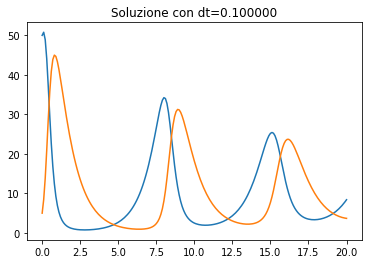

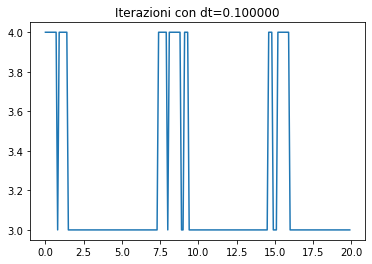

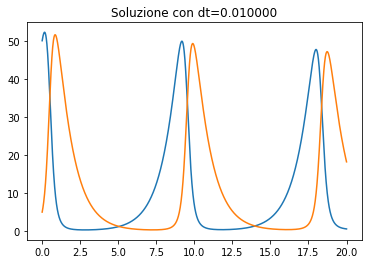

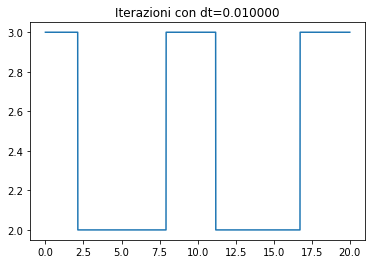

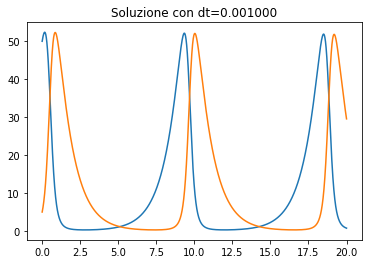

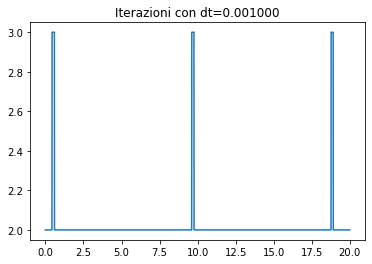

In [223]:
for dt in [0.1, 0.01, 0.001]:
    Nt = int(t_max/dt)
    y = [y_ini]
    nit =  np.zeros(Nt)
    J = lambda t,y: np.eye(2)-dt*df(t,y)   #contiene le derivate di f e dipende da dt

    for tt in range(Nt):
        residual = lambda t,x: x - np.array(y[-1]) - dt*f(t,x)   #dipende da f e dt
        ynew, nit[tt] = newton_for_sys(y[-1],tt*dt, residual, J, 1.0e-6, 100)
        y.append(ynew)
    y = np.stack(y)  #questa istruzione trasforma una lista di np.array in un array 2D
    #così può essere letto "per colonne"
    
    plt.figure()
    plt.plot(np.arange(0,Nt+1)*dt,y) 
    plt.title("Soluzione con dt=%f"%dt)
    plt.figure()
    plt.plot(np.arange(0,Nt)*dt,nit)
    plt.title("Iterazioni con dt=%f"%dt)


Notiamo che per passi temporali più lunghi la soluzione, che dovrebbe essere periodica, si smorza in tempo a causa delle proprietà del metodo di Eulero implicito. Notiamo che il numero di iterazioni è massimo in corrispondenza dei "picchi" di popolazione e, anche se debolmente, diminuisce con passi tmeporali più corti. Questo ha senso, perché osserviamo che il metodo di Newton sta utilizzando come guess iniziale la soluzione al passo precedente: se $\Delta t$ è piccolo tale soluzione è verosimilmente più vicina alla soluzione che stiamo cercando.